In [266]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
from sklearn import datasets
from sklearn import tree
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import plotly.express as px

nbc = GaussianNB()

In [57]:
with open ("Opioids.csv") as file :
    df=pd.read_csv(file)

In [58]:
#Showing the few rows of the data frame
df.head()

,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,CANCER_DEATHS_NOIMP,CANCER_CDR,NP_RX,PDMP_REQ_CHECK
0,2006,2013,AK,Aleutians East (B),"ALEUTIANS EAST (B), AK",9.0,1.0,5,0,0,...,45.561012,5.855686,0,NaN,23.978888,NaN,NaN,32.210746,1,0
1,2006,2130,AK,Ketchikan Gateway (B),"KETCHIKAN GATEWAY (B), AK",7.0,2.0,9,1,0,...,31.358338,10.213688,0,NaN,29.214887,NaN,72.0,53.795577,1,0
2,2006,2016,AK,Aleutians West (CA),"ALEUTIANS WEST (CA), AK",7.0,2.0,2,0,0,...,38.518801,3.683909,0,NaN,11.462599,NaN,NaN,32.214865,1,0
3,2006,2185,AK,North Slope (B),"NORTH SLOPE (B), AK",7.0,1.0,2,0,0,...,46.973366,6.083535,0,NaN,40.258017,NaN,30.0,45.399516,1,0
4,2006,2280,AK,Wrangell-Petersburg (CA),"WRANGELL-PETERSBURG (CA), AK",7.0,2.0,24,2,0,...,100.000000,100.000000,0,NaN,410.104987,NaN,39.0,63.976378,1,0


In [59]:
#Displaying the columns types we have in our data frame
df.dtypes


YR                       int64
F00002                   int64
F12424                  object
F00010                  object
F04437                  object
                        ...   
ORD_CDR_NOIMP          float64
CANCER_DEATHS_NOIMP    float64
CANCER_CDR             float64
NP_RX                    int64
PDMP_REQ_CHECK           int64
Length: 156, dtype: object

In [60]:
#Displaying the length of our data frame
len(df)

26970

In [61]:
#Listing no of columns and columns headers we have in our data frame
print(len(list(df.columns.values)))
list(df.columns.values)

156


['YR',
 'F00002',
 'F12424',
 'F00010',
 'F04437',
 'F00020',
 'F09787',
 'F14642',
 'F13214',
 'F13220',
 'F11984',
 'F04538',
 'F04542',
 'F11396',
 'F13191',
 'F06795',
 'F04820',
 'F04821',
 'F04904',
 'F04905',
 'F04906',
 'F04907',
 'F12016',
 'F12017',
 'F04916',
 'F04917',
 'F04918',
 'F04919',
 'F12034',
 'F12035',
 'F10498',
 'F11318',
 'F11319',
 'F13176',
 'F10505',
 'F08921',
 'F08922',
 'F08923',
 'F08924',
 'F14045',
 'F09545',
 'F09566',
 'F09567',
 'F09568',
 'F09571',
 'F15297',
 'F13906',
 'F13907',
 'F13908',
 'F13909',
 'F13910',
 'F13911',
 'F13914',
 'F13915',
 'F13920',
 'F13921',
 'F15549',
 'F12558',
 'F09781',
 'F13226',
 'F13321',
 'F15474',
 'F14482',
 'F14587',
 'F14206',
 'F06712',
 'F06713',
 'F06714',
 'F06715',
 'F06716',
 'F06717',
 'F06718',
 'F06719',
 'F06720',
 'F06721',
 'F06722',
 'F06723',
 'F06724',
 'F06725',
 'F06726',
 'F06727',
 'F11640',
 'F11641',
 'F11642',
 'F11643',
 'F13483',
 'N_BLACK',
 'N_ASIAN',
 'N_HISP',
 'F13874',
 'F09721',
 

In [62]:
#Dropping the unrelated columns
df=df.drop(['CANCER_CDR_NOIMP','CANCER_CDR','CANCER_DEATHS','CANCER_DEATHS_NOIMP'], axis=1)

In [63]:
#Drop the NA values
df=df.dropna()
df.head()

,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,SPEC_PC,PCT_25T44,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,NP_RX,PDMP_REQ_CHECK
5,2006,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,17.395626,29.531561,31.056163,8.783549,0,24.0,29.821074,29.821074,1,0
11,2006,2020,AK,Anchorage (B),"ANCHORAGE (B), AK",2.0,2.0,232,4,2,...,77.502691,30.320057,27.842483,7.584858,0,64.0,22.963760,22.963760,1,0
14,2006,2122,AK,Kenai Peninsula (B),"KENAI PENINSULA (B), AK",7.0,2.0,30,3,1,...,22.942796,25.131921,34.976292,11.999082,0,12.0,22.942796,22.942796,1,0
17,2006,2090,AK,Fairbanks North Star (B),"FAIRBANKS NORTH STAR (B), AK",3.0,2.0,44,1,0,...,43.802015,33.090117,28.149711,7.348364,0,12.0,13.832215,13.832215,1,0
19,2007,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,18.144649,28.749592,30.233824,8.550968,0,34.0,41.127871,41.127871,1,0


In [64]:
# Adding a new column which is a summasation of four other columns
df['Total_Opioids_Death']=df['ORD_DEATHS']+df['ORD_DEATHS_NOIMP']+df['ORD_CDR']+df['ORD_CDR_NOIMP']

In [282]:
# Gives us description about the columns like mean , median and stadard deviation.
df.describe()

,YR,F00002,F00020,F09787,F14642,F13214,F13220,F11984,F04538,F04542,...,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,NP_RX,PDMP_REQ_CHECK,Total_Opioids_Death,Total_Dentist,Difference_Income
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9.497000e+03,9497.000000,9497.000000,...,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9.497000e+03
mean,2010.242287,31776.630199,3.034221,1.274613,104.104243,8.536485,2.434979,2.483216e+05,8.685606,9.222944,...,14.238243,0.049173,62.786985,34.538908,34.538908,0.134990,0.035274,194.651786,42.364642,1.074167e+10
std,2.576330,15214.901554,1.998469,0.786885,208.016398,36.811059,5.691227,5.117866e+05,11.146880,12.242088,...,3.757074,0.216241,111.601008,26.098084,26.098084,0.341731,0.184482,232.076715,18.555113,2.451503e+10
min,2006.000000,1003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.260000e+03,0.100000,0.400000,...,5.430090,0.000000,10.000000,1.484176,1.484176,0.000000,0.000000,23.893649,0.000000,1.665391e+08
25%,2008.000000,19013.000000,1.000000,1.000000,14.000000,1.000000,0.000000,5.056200e+04,1.400000,2.400000,...,11.698812,0.000000,15.000000,18.196810,18.196810,0.000000,0.000000,83.208238,28.633276,1.687361e+09
50%,2010.000000,36021.000000,2.000000,1.000000,34.000000,2.000000,1.000000,1.029310e+05,4.200000,4.800000,...,13.991738,0.000000,25.000000,28.186421,28.186421,0.000000,0.000000,123.601890,40.842842,3.660137e+09
75%,2013.000000,45041.000000,4.000000,2.000000,94.000000,5.000000,3.000000,2.372970e+05,11.100000,10.500000,...,16.215540,0.000000,57.000000,42.649379,42.649379,0.000000,0.000000,207.907157,54.194985,9.141648e+09
max,2014.000000,56041.000000,9.000000,2.000000,2928.000000,694.000000,252.000000,1.011670e+07,79.100000,95.700000,...,58.937296,1.000000,2001.000000,323.583796,323.583796,1.000000,1.000000,4078.280064,144.378271,5.273838e+11


In [65]:
# Finding the new length of the data frame and printing the first few rows
print(len(df))
df.head()

9497


,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,PCT_25T44,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,NP_RX,PDMP_REQ_CHECK,Total_Opioids_Death
5,2006,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,29.531561,31.056163,8.783549,0,24.0,29.821074,29.821074,1,0,107.642147
11,2006,2020,AK,Anchorage (B),"ANCHORAGE (B), AK",2.0,2.0,232,4,2,...,30.320057,27.842483,7.584858,0,64.0,22.963760,22.963760,1,0,173.927521
14,2006,2122,AK,Kenai Peninsula (B),"KENAI PENINSULA (B), AK",7.0,2.0,30,3,1,...,25.131921,34.976292,11.999082,0,12.0,22.942796,22.942796,1,0,69.885592
17,2006,2090,AK,Fairbanks North Star (B),"FAIRBANKS NORTH STAR (B), AK",3.0,2.0,44,1,0,...,33.090117,28.149711,7.348364,0,12.0,13.832215,13.832215,1,0,51.664430
19,2007,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,28.749592,30.233824,8.550968,0,34.0,41.127871,41.127871,1,0,150.255743


In [66]:
df['Total_Dentist']=df['DENTISTS_LT35_PC']+df['DENTISTS_35T44_PC']+df['DENTISTS_45T54_PC']+df['DENTISTS_55T64_PC']+df['DENTISTS_65PLUS_PC']

In [67]:
df.head()

,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,NP_RX,PDMP_REQ_CHECK,Total_Opioids_Death,Total_Dentist
5,2006,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,31.056163,8.783549,0,24.0,29.821074,29.821074,1,0,107.642147,38.518887
11,2006,2020,AK,Anchorage (B),"ANCHORAGE (B), AK",2.0,2.0,232,4,2,...,27.842483,7.584858,0,64.0,22.963760,22.963760,1,0,173.927521,71.044133
14,2006,2122,AK,Kenai Peninsula (B),"KENAI PENINSULA (B), AK",7.0,2.0,30,3,1,...,34.976292,11.999082,0,12.0,22.942796,22.942796,1,0,69.885592,49.709391
17,2006,2090,AK,Fairbanks North Star (B),"FAIRBANKS NORTH STAR (B), AK",3.0,2.0,44,1,0,...,28.149711,7.348364,0,12.0,13.832215,13.832215,1,0,51.664430,59.939599
19,2007,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,30.233824,8.550968,0,34.0,41.127871,41.127871,1,0,150.255743,37.498942


In [68]:
col_names=df['MD_PC']+df['SPEC_PC']+df['Total_Dentist']

In [69]:
df.head()

,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,NP_RX,PDMP_REQ_CHECK,Total_Opioids_Death,Total_Dentist
5,2006,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,31.056163,8.783549,0,24.0,29.821074,29.821074,1,0,107.642147,38.518887
11,2006,2020,AK,Anchorage (B),"ANCHORAGE (B), AK",2.0,2.0,232,4,2,...,27.842483,7.584858,0,64.0,22.963760,22.963760,1,0,173.927521,71.044133
14,2006,2122,AK,Kenai Peninsula (B),"KENAI PENINSULA (B), AK",7.0,2.0,30,3,1,...,34.976292,11.999082,0,12.0,22.942796,22.942796,1,0,69.885592,49.709391
17,2006,2090,AK,Fairbanks North Star (B),"FAIRBANKS NORTH STAR (B), AK",3.0,2.0,44,1,0,...,28.149711,7.348364,0,12.0,13.832215,13.832215,1,0,51.664430,59.939599
19,2007,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,30.233824,8.550968,0,34.0,41.127871,41.127871,1,0,150.255743,37.498942


In [70]:
op_main=pd.DataFrame()
op_main["State"]=df['F12424']
op_main["County"]=df['F00010']
op_main["Total_Dentist"]=df['Total_Dentist']
op_main["Total_Medical_Doctors"]=df['MD_PC']
op_main["Total_Medical_Specialist"]=df['SPEC_PC']
op_main["Total_Opioid_Shipment"]=df['SHIP_COUNT']
op_main["Total_Opioid_Distributed"]=df['DOSAGE_UNIT']
op_main["Total_Crude_Deaths"]=df['ARF_CDR']
op_main["Total_Nurse_Practioner"]=df['NP_PC']
op_main["Eligible_Medicare_Medicaid"]=df['PCT_DUALS']
op_main["Population_Estimate"]=df['F11984']
op_main["Total_Hospital_Beds"]=df['F08921']
op_main["Percapita_Medicare_Cost"]=df['F15297']
op_main["Total_Male_Population"]=df['F13906']
op_main["Total_Female_Population"]=df['F13907']
op_main["Percapita_Personal_Income"]=df['F09781']
op_main["Poverty_Percentage"]=df['F13321']
op_main["Total_Opioids_Death"]=df['Total_Opioids_Death']
op_main["State_County_Code"]=df['F00002']



In [71]:
op_main=pd.DataFrame(op_main)

In [72]:
print(max(op_main['Total_Opioids_Death']))
print(min(op_main['Total_Opioids_Death']))
print(np.quantile(op_main['Total_Opioids_Death'], [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

4078.280064104226
23.89364887463814
[  23.89364887   59.6269876    75.94847194   90.66128251  106.72834246
  123.60189046  147.63136424  182.10237622  242.18015322  383.78252815
 4078.2800641 ]


In [73]:

result = []
for value in op_main["Total_Opioids_Death"]:
    if value <  59.6269876     :
        result.append(1)
    elif value < 75.94847194   and value > 59.6269876      :
        result.append(2)
    elif value < 90.66128251    and value > 75.94847194    :
        result.append(2)
    elif value < 106.72834246   and value > 90.66128251   :
        result.append(4)
    elif value < 123.60189046   and value > 106.72834246   :
        result.append(5)
    elif value < 147.63136424   and value > 123.60189046   :
        result.append(6)  
    elif value < 182.10237622   and value > 147.63136424   :
        result.append(7)
    elif value < 242.18015322   and value > 182.10237622   :
        result.append(8)
    elif value < 383.78252815   and value > 242.18015322   :
        result.append(9)
    elif value < 4078.2800641   and value > 383.78252815   :
        result.append(10)
    else:
        result.append(0)
      
op_main["Total_Opioids_Death_Quartile"] = result 

In [74]:
op_main.head()

,State,County,Total_Dentist,Total_Medical_Doctors,Total_Medical_Specialist,Total_Opioid_Shipment,Total_Opioid_Distributed,Total_Crude_Deaths,Total_Nurse_Practioner,Eligible_Medicare_Medicaid,Population_Estimate,Total_Hospital_Beds,Percapita_Medicare_Cost,Total_Male_Population,Total_Female_Population,Percapita_Personal_Income,Poverty_Percentage,Total_Opioids_Death,State_County_Code,Total_Opioids_Death_Quartile
5,AK,Matanuska-Susitna (B),38.518887,103.131213,17.395626,8286,2638470.0,0.478380,32.306163,1.807903,80480.0,74,6451.30,41768.0,38712.0,32732,11.0,107.642147,2170,5
11,AK,Anchorage (B),71.044133,327.951202,77.502691,25146,7167856.0,0.456046,83.243631,1.933620,278700.0,904,6710.57,141550.0,137150.0,43483,9.4,173.927521,2020,7
14,AK,Kenai Peninsula (B),49.709391,160.599572,22.942796,5012,1774000.0,0.581217,57.356990,2.475910,52304.0,95,6569.31,27204.0,25100.0,33929,11.0,69.885592,2122,2
17,AK,Fairbanks North Star (B),59.939599,219.010074,43.802015,5654,1848900.0,0.342347,50.718123,1.391290,86754.0,266,6037.52,45364.0,41390.0,34722,9.1,51.664430,2090,1
19,AK,Matanuska-Susitna (B),37.498942,107.658252,18.144649,9764,2995860.0,0.472971,31.450725,1.874947,82669.0,74,6451.30,43107.0,39562.0,34341,9.5,150.255743,2170,7


In [75]:
len(op_main)

9497

In [76]:
train = op_main.sample(frac=7.5/10,random_state=1)
train.head()

,State,County,Total_Dentist,Total_Medical_Doctors,Total_Medical_Specialist,Total_Opioid_Shipment,Total_Opioid_Distributed,Total_Crude_Deaths,Total_Nurse_Practioner,Eligible_Medicare_Medicaid,Population_Estimate,Total_Hospital_Beds,Percapita_Medicare_Cost,Total_Male_Population,Total_Female_Population,Percapita_Personal_Income,Poverty_Percentage,Total_Opioids_Death,State_County_Code,Total_Opioids_Death_Quartile
14902,NC,Pender,21.848100,59.926216,13.108860,4129,1570990.0,0.882039,24.345025,3.889586,53399.0,68,8717.87,26692.0,26707.0,30776,16.4,91.926216,37141,4
3166,FL,Duval,42.936085,386.765833,122.100677,107935,47675001.8,0.869598,70.486425,3.679164,879602.0,3367,11815.78,426602.0,453000.0,39042,18.0,625.892533,12031,10
14908,NC,Robeson,16.234126,110.687220,33.944081,18986,9108360.0,0.895829,26.564933,6.441996,135517.0,373,10568.45,65955.0,69562.0,25286,30.9,139.033184,37155,6
18287,OH,Geauga,43.630017,257.523518,69.169540,7588,2411970.0,0.805559,11.705614,1.511088,93972.0,340,8502.74,46364.0,47608.0,57945,7.4,148.618567,39055,7
1198,AR,Pulaski,61.961214,746.619772,238.589238,62908,20575112.0,0.886225,92.299070,3.686307,388953.0,3746,8584.03,186936.0,202017.0,45389,18.6,188.565071,5119,8


In [77]:
test = op_main.drop(train.index)
test.head()

,State,County,Total_Dentist,Total_Medical_Doctors,Total_Medical_Specialist,Total_Opioid_Shipment,Total_Opioid_Distributed,Total_Crude_Deaths,Total_Nurse_Practioner,Eligible_Medicare_Medicaid,Population_Estimate,Total_Hospital_Beds,Percapita_Medicare_Cost,Total_Male_Population,Total_Female_Population,Percapita_Personal_Income,Poverty_Percentage,Total_Opioids_Death,State_County_Code,Total_Opioids_Death_Quartile
5,AK,Matanuska-Susitna (B),38.518887,103.131213,17.395626,8286,2638470.0,0.478380,32.306163,1.807903,80480.0,74,6451.30,41768.0,38712.0,32732,11.0,107.642147,2170,5
14,AK,Kenai Peninsula (B),49.709391,160.599572,22.942796,5012,1774000.0,0.581217,57.356990,2.475910,52304.0,95,6569.31,27204.0,25100.0,33929,11.0,69.885592,2122,2
37,AK,Matanuska-Susitna (B),40.955791,105.314892,17.552482,9761,3166320.0,0.482108,30.424302,1.916731,85458.0,74,7484.91,44755.0,40703.0,38657,9.3,182.293899,2170,8
55,AK,Fairbanks North Star (B),64.869248,190.553416,41.050071,7130,2391940.0,0.365903,44.597608,1.273566,98660.0,231,7612.58,52574.0,46086.0,38895,7.9,104.706264,2090,4
70,AK,Fairbanks North Star (B),55.338642,198.809194,42.016376,7716,2678260.0,0.392494,45.090745,1.325053,97581.0,231,7671.22,52422.5,46503.5,46057,9.4,68.842849,2090,2


In [78]:
print(len(test))

2374


In [79]:
print(len(train))

7123


In [80]:
corr_op_main=op_main.corr() 
corr_op_main.style.background_gradient(cmap='Greens')

,Total_Dentist,Total_Medical_Doctors,Total_Medical_Specialist,Total_Opioid_Shipment,Total_Opioid_Distributed,Total_Crude_Deaths,Total_Nurse_Practioner,Eligible_Medicare_Medicaid,Population_Estimate,Total_Hospital_Beds,Percapita_Medicare_Cost,Total_Male_Population,Total_Female_Population,Percapita_Personal_Income,Poverty_Percentage,Total_Opioids_Death,State_County_Code,Total_Opioids_Death_Quartile
Total_Dentist,1,0.670589,0.635287,0.355438,0.313023,-0.311014,0.381719,-0.353066,0.313846,0.352293,0.0427599,0.31243,0.315021,0.619991,-0.371648,0.225661,-0.100883,0.175463
Total_Medical_Doctors,0.670589,1,0.973599,0.30038,0.264957,-0.214319,0.674994,-0.172027,0.259356,0.409876,0.126347,0.25522,0.263335,0.521317,-0.117757,0.246625,-0.0527852,0.153044
Total_Medical_Specialist,0.635287,0.973599,1,0.335881,0.296136,-0.22691,0.65477,-0.155287,0.298147,0.447406,0.221675,0.293275,0.302803,0.519156,-0.109902,0.292609,-0.0543459,0.200695
Total_Opioid_Shipment,0.355438,0.30038,0.335881,1,0.975902,-0.225204,0.118579,-0.168089,0.911105,0.873853,0.383266,0.910697,0.911401,0.30159,-0.0757752,0.773492,-0.140961,0.438884
Total_Opioid_Distributed,0.313023,0.264957,0.296136,0.975902,1,-0.193072,0.105359,-0.132628,0.888717,0.846618,0.376489,0.889227,0.888017,0.256661,-0.0341778,0.762984,-0.14812,0.427591
Total_Crude_Deaths,-0.311014,-0.214319,-0.22691,-0.225204,-0.193072,1,0.0394243,0.662418,-0.266416,-0.191438,-0.042633,-0.268986,-0.263853,-0.348994,0.415103,-0.0747953,0.115484,0.0283428
Total_Nurse_Practioner,0.381719,0.674994,0.65477,0.118579,0.105359,0.0394243,1,0.154945,0.0552982,0.22308,0.0575612,0.052316,0.0581958,0.205713,0.166549,0.156663,-0.00941683,0.139096
Eligible_Medicare_Medicaid,-0.353066,-0.172027,-0.155287,-0.168089,-0.132628,0.662418,0.154945,1,-0.136783,-0.0709566,0.0528234,-0.138943,-0.134552,-0.378068,0.669373,-0.0149869,0.0381717,0.0596155
Population_Estimate,0.313846,0.259356,0.298147,0.911105,0.888717,-0.266416,0.0552982,-0.136783,1,0.920928,0.386078,0.999821,0.99983,0.291952,-0.0731812,0.71251,-0.140834,0.361505
Total_Hospital_Beds,0.352293,0.409876,0.447406,0.873853,0.846618,-0.191438,0.22308,-0.0709566,0.920928,1,0.415512,0.917588,0.923973,0.314774,0.0123497,0.712056,-0.114057,0.358346



# Model 1.1

In [81]:
train_X = np.asarray(train[['State_County_Code','Total_Dentist','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Total_Crude_Deaths','Total_Nurse_Practioner','Eligible_Medicare_Medicaid','Population_Estimate',
 'Total_Hospital_Beds','Percapita_Medicare_Cost','Total_Male_Population','Total_Female_Population','Percapita_Personal_Income',
 'Poverty_Percentage',]])
train_y = np.asarray(train.Total_Opioids_Death_Quartile)

In [82]:
test_X = np.asarray(test[['State_County_Code','Total_Dentist','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Total_Crude_Deaths','Total_Nurse_Practioner','Eligible_Medicare_Medicaid','Population_Estimate',
 'Total_Hospital_Beds','Percapita_Medicare_Cost','Total_Male_Population','Total_Female_Population','Percapita_Personal_Income',
 'Poverty_Percentage',]])
test_y = np.asarray(test.Total_Opioids_Death_Quartile)

In [83]:
lab = preprocessing.LabelEncoder()
train_y = lab.fit_transform(train_y)
test_y = lab.fit_transform(test_y)

In [84]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_X, train_y)

In [85]:
y_pred = clf.fit(train_X, train_y).predict(train_X)
print("Number of mislabeled points out of a total {} points : {}"
      .format(len(train),(train_y != y_pred).sum()))

Number of mislabeled points out of a total 7123 points : 0


In [86]:
y_pred = clf.fit(train_X, train_y).predict(test_X)
print("Number of mislabeled points out of a total {} points : {}"
      .format(len(test),(test_y != y_pred).sum()))

print("error rate : {}".format((test_y != y_pred).sum()/len(test)))

Number of mislabeled points out of a total 2374 points : 1985
error rate : 0.8361415332771693


In [87]:
regr = linear_model.LinearRegression()

In [88]:
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
regr.intercept_

-1.4510487285648215

In [90]:
rerg_coefficinet = zip(['State_County_Code','Total_Dentist','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Total_Crude_Deaths','Total_Nurse_Practioner','Eligible_Medicare_Medicaid','Population_Estimate',
 'Total_Hospital_Beds','Percapita_Medicare_Cost','Total_Male_Population','Total_Female_Population','Percapita_Personal_Income',
 'Poverty_Percentage',],regr.coef_)
list(rerg_coefficinet)

[('State_County_Code', 2.1358116195425223e-06),
 ('Total_Dentist', 0.010479029976320962),
 ('Total_Medical_Doctors', -0.009137020543466297),
 ('Total_Medical_Specialist', 0.02413532980819177),
 ('Total_Opioid_Shipment', 4.897447877450101e-05),
 ('Total_Opioid_Distributed', 6.596907169836852e-09),
 ('Total_Crude_Deaths', 1.2267039761190142),
 ('Total_Nurse_Practioner', 0.007551784427122858),
 ('Eligible_Medicare_Medicaid', 0.06154920255978927),
 ('Population_Estimate', 2.6747090571659527e-05),
 ('Total_Hospital_Beds', -0.0003267141211689873),
 ('Percapita_Medicare_Cost', 7.992469270511491e-05),
 ('Total_Male_Population', -3.7778735268491115e-05),
 ('Total_Female_Population', -1.6003749234916407e-05),
 ('Percapita_Personal_Income', 3.758917109134373e-05),
 ('Poverty_Percentage', 0.04277379848959325)]

In [91]:
print('R-squared for training data:\n {}'.format(regr.score(train_X,train_y)))

R-squared for training data:
 0.2938941527830391


In [92]:
z = zip(col_names,clf.feature_importances_)
list(z)

[(159.04572564612312, 0.05335739382851851),
 (476.49802655184794, 0.055132068798974886),
 (233.25175894769006, 0.04090552100374373),
 (322.75168868294236, 0.04682254911739161),
 (163.30184228670996, 0.14234657295013525),
 (233.53485130986724, 0.09723876903259963),
 (283.12338435025237, 0.061062310690001606),
 (484.8554194035132, 0.0623088676046735),
 (163.82316459547408, 0.05176656046733616),
 (244.34084143121936, 0.055035736888674594),
 (285.8017760538939, 0.05439730633347659),
 (396.92784303601405, 0.059228398594490875),
 (487.0310088345993, 0.06403034045994484),
 (251.53205890423516, 0.04127428570211347),
 (171.9865578927118, 0.05957078955410419),
 (296.4727346442327, 0.05552252897382051)]

In [93]:
y_pred

array([5, 2, 1, ..., 2, 3, 3])

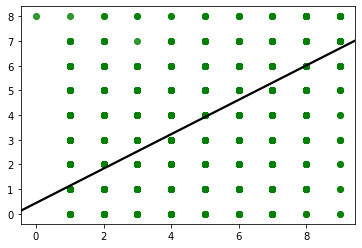

In [94]:
sns.regplot(x=test_y,y=y_pred,ci=None,scatter_kws={"color":"green"},line_kws={"color":"black"});

# Model 1.2

In [170]:
train1_X = np.asarray(train[['State_County_Code','Total_Dentist','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Total_Crude_Deaths','Total_Nurse_Practioner','Eligible_Medicare_Medicaid','Population_Estimate',
 'Total_Hospital_Beds','Percapita_Medicare_Cost','Total_Male_Population','Total_Female_Population','Percapita_Personal_Income',
 'Poverty_Percentage',]])
train1_y = np.asarray(train.Total_Opioids_Death)

In [171]:
test1_X = np.asarray(test[['State_County_Code','Total_Dentist','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Total_Crude_Deaths','Total_Nurse_Practioner','Eligible_Medicare_Medicaid','Population_Estimate',
 'Total_Hospital_Beds','Percapita_Medicare_Cost','Total_Male_Population','Total_Female_Population','Percapita_Personal_Income',
 'Poverty_Percentage',]])
test1_y = np.asarray(test.Total_Opioids_Death)

In [172]:
lab = preprocessing.LabelEncoder()
train1_y = lab.fit_transform(train1_y)
test1_y = lab.fit_transform(test1_y)

In [173]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train1_X, train1_y)

In [174]:
y1_pred = clf.fit(train1_X, train1_y).predict(train1_X)
print("Number of mislabeled points out of a total {} points : {}"
      .format(len(train),(train1_y != y1_pred).sum()))

Number of mislabeled points out of a total 7123 points : 0


In [176]:
y1_pred = clf.fit(train1_X, train1_y).predict(test1_X)
print("Number of mislabeled points out of a total {} points : {}"
      .format(len(test),(test1_y != y1_pred).sum()))

print("error rate : {}".format((test1_y != y1_pred).sum()/len(test)))

Number of mislabeled points out of a total 2374 points : 2373
error rate : 0.9995787700084247


In [177]:
regr = linear_model.LinearRegression()

In [178]:
regr.fit(train1_X, train1_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [179]:
regr.intercept_

-449.6960673029171

In [180]:
rerg_coefficinet = zip(['State_County_Code','Total_Dentist','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Total_Crude_Deaths','Total_Nurse_Practioner','Eligible_Medicare_Medicaid','Population_Estimate',
 'Total_Hospital_Beds','Percapita_Medicare_Cost','Total_Male_Population','Total_Female_Population','Percapita_Personal_Income',
 'Poverty_Percentage',],regr.coef_)
list(rerg_coefficinet)

[('State_County_Code', 0.0021138077180192965),
 ('Total_Dentist', 6.677333993025894),
 ('Total_Medical_Doctors', -6.955405441591866),
 ('Total_Medical_Specialist', 18.353770518759582),
 ('Total_Opioid_Shipment', 0.03766874780928061),
 ('Total_Opioid_Distributed', 5.874143260697906e-06),
 ('Total_Crude_Deaths', 1064.9192233547171),
 ('Total_Nurse_Practioner', 5.851337061281697),
 ('Eligible_Medicare_Medicaid', 45.44608461394042),
 ('Population_Estimate', 0.01969589464922092),
 ('Total_Hospital_Beds', -0.2726003350765206),
 ('Percapita_Medicare_Cost', 0.05353555383885179),
 ('Total_Male_Population', -0.028073803351945897),
 ('Total_Female_Population', -0.011369494951947709),
 ('Percapita_Personal_Income', 0.030125433900656823),
 ('Poverty_Percentage', 32.86126048534994)]

In [181]:
print('R-squared for training data:\n {}'.format(regr.score(train1_X,train1_y)))

R-squared for training data:
 0.2818495392447571


In [182]:
z = zip(col_names,clf.feature_importances_)
list(z)

[(159.04572564612312, 0.01668140311409561),
 (476.49802655184794, 0.08543144824947778),
 (233.25175894769006, 0.049793653293268146),
 (322.75168868294236, 0.04508608874625986),
 (163.30184228670996, 0.06224894026606179),
 (233.53485130986724, 0.046024879271067264),
 (283.12338435025237, 0.05539191460807913),
 (484.8554194035132, 0.05470074637667882),
 (163.82316459547408, 0.0438997226990974),
 (244.34084143121936, 0.07830555110374247),
 (285.8017760538939, 0.04313046702344889),
 (396.92784303601405, 0.08328665659615729),
 (487.0310088345993, 0.11406928227551602),
 (251.53205890423516, 0.1460164731018395),
 (171.9865578927118, 0.03985443766382599),
 (296.4727346442327, 0.03607833561138399)]

In [183]:
y1_pred

array([2895,  628, 4346, ..., 1066, 1918, 1258])

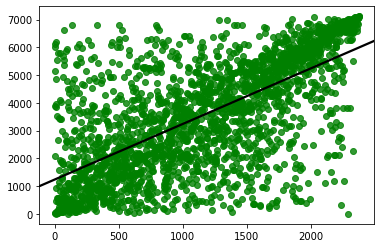

In [185]:
sns.regplot(x=test1_y,y=y1_pred,ci=None,scatter_kws={"color":"green"},line_kws={"color":"black"});

# Model 2.1

In [140]:
train2_X = np.asarray(train[['State_County_Code','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Population_Estimate','Total_Hospital_Beds','Total_Male_Population','Total_Female_Population']])
train2_y = np.asarray(train.Total_Opioids_Death_Quartile)

In [141]:
test2_X = np.asarray(test[['State_County_Code','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Population_Estimate','Total_Hospital_Beds','Total_Male_Population','Total_Female_Population']])
test2_y = np.asarray(test.Total_Opioids_Death_Quartile)

In [142]:
lab = preprocessing.LabelEncoder()
train2_y = lab.fit_transform(train2_y)
test2_y = lab.fit_transform(test2_y)

In [143]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train2_X, train2_y)

In [144]:
y2_pred = clf.fit(train2_X, train2_y).predict(train2_X)
print("Number of mislabeled points out of a total {} points : {}"
      .format(len(train),(train2_y != y2_pred).sum()))

Number of mislabeled points out of a total 7123 points : 0


In [145]:
y2_pred

array([2, 8, 4, ..., 4, 2, 8])

In [146]:
y2_pred = clf.fit(train2_X, train2_y).predict(test2_X)
print("Number of mislabeled points out of a total {} points : {}".format(len(test),(test2_y != y2_pred).sum()))

print("error rate : {}".format((test2_y != y2_pred).sum()/len(test)))

Number of mislabeled points out of a total 2374 points : 1984
error rate : 0.8357203032855939


In [147]:
regr = linear_model.LinearRegression()

In [148]:
regr.fit(train2_X, train2_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
regr.intercept_

2.987195039802306

In [150]:
rerg_coefficinet = zip(['State_County_Code','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Population_Estimate','Total_Hospital_Beds','Total_Male_Population','Total_Female_Population'],regr.coef_)
list(rerg_coefficinet)

[('State_County_Code', 1.9070445962662844e-06),
 ('Total_Medical_Doctors', -0.007846606459353315),
 ('Total_Medical_Specialist', 0.024732170376321326),
 ('Total_Opioid_Shipment', 4.315300958457526e-05),
 ('Total_Opioid_Distributed', 2.4655629319442207e-08),
 ('Population_Estimate', 2.6164790308789293e-05),
 ('Total_Hospital_Beds', -0.00013550790817619255),
 ('Total_Male_Population', -4.7294923345857074e-05),
 ('Total_Female_Population', -6.844587576805263e-06)]

In [151]:
print('R-squared for training data:\n {}'.format(regr.score(train2_X,train2_y)))

R-squared for training data:
 0.2517699280261807


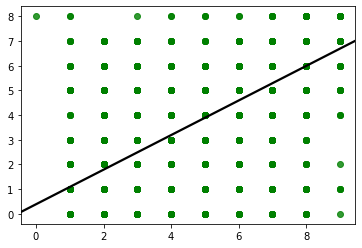

In [152]:
sns.regplot(x=test2_y,y=y2_pred,ci=None,scatter_kws={"color":"green"},line_kws={"color":"black"});

# Model 2.2

In [198]:
train3_X = np.asarray(train[['State_County_Code','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Population_Estimate','Total_Hospital_Beds','Total_Male_Population','Total_Female_Population']])
train3_y = np.asarray(train.Total_Opioids_Death)

In [199]:
test3_X = np.asarray(test[['State_County_Code','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Population_Estimate','Total_Hospital_Beds','Total_Male_Population','Total_Female_Population']])
test3_y = np.asarray(test.Total_Opioids_Death)

In [200]:
lab = preprocessing.LabelEncoder()
train3_y = lab.fit_transform(train3_y)
test3_y = lab.fit_transform(test3_y)

In [201]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train3_X, train3_y)

In [202]:
y3_pred = clf.fit(train3_X, train3_y).predict(train3_X)
print("Number of mislabeled points out of a total {} points : {}"
      .format(len(train),(train3_y != y3_pred).sum()))

Number of mislabeled points out of a total 7123 points : 0


In [203]:
y3_predn = clf.fit(train3_X, train3_y).predict(test3_X)
print("Number of mislabeled points out of a total {} points : {}".format(len(test),(test3_y != y3_predn).sum()))

print("error rate : {}".format((test3_y != y3_predn).sum()/len(test)))

Number of mislabeled points out of a total 2374 points : 2374
error rate : 1.0


In [204]:
regr = linear_model.LinearRegression()

In [205]:
regr.fit(train3_X, train3_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [206]:
regr.intercept_

3002.022439972675

In [207]:
rerg_coefficinet = zip(['State_County_Code','Total_Medical_Doctors','Total_Medical_Specialist','Total_Opioid_Shipment',
 'Total_Opioid_Distributed','Population_Estimate','Total_Hospital_Beds','Total_Male_Population','Total_Female_Population'],regr.coef_)
list(rerg_coefficinet)

[('State_County_Code', 0.0022048216507987543),
 ('Total_Medical_Doctors', -5.986143981015619),
 ('Total_Medical_Specialist', 18.621517308655132),
 ('Total_Opioid_Shipment', 0.03267411954657042),
 ('Total_Opioid_Distributed', 2.0752489276354424e-05),
 ('Population_Estimate', 0.019122004702484457),
 ('Total_Hospital_Beds', -0.11521894185403204),
 ('Total_Male_Population', -0.03555926330028106),
 ('Total_Female_Population', -0.004009884427978991)]

In [208]:
print('R-squared for training data:\n {}'.format(regr.score(train3_X,train3_y)))

R-squared for training data:
 0.23954314638295893


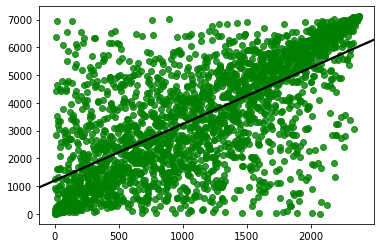

In [209]:
sns.regplot(x=test3_y,y=y3_predn,ci=None,scatter_kws={"color":"green"},line_kws={"color":"black"});

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

# Plotting the Graph for the US states v/s the total number Opioid deaths



In [153]:
opi = df.groupby('F12424')['Total_Opioids_Death'].sum()
print(opi)

F12424
AK      6269.736775
AL     13300.528908
AR     12798.203062
AZ     36474.579986
CA    120049.911795
CO     26242.402518
CT     22481.565888
DC      3261.955817
DE      7044.302496
FL    103718.492606
GA     43656.021972
HI      4227.090095
IA      8663.217275
ID      4564.727624
IL     69461.448955
IN     29275.534524
KS      7522.782442
KY     89166.811049
LA     12743.070477
MA     53273.123328
MD     52817.739763
ME     12525.611449
MI     58075.437759
MN     16417.042002
MO     42638.502507
MS      5731.180161
MT      4989.280484
NC     88931.760234
ND       756.069112
NE      2473.054156
NH     16342.276734
NJ     34115.555978
NM     28093.658969
NV     27547.268510
NY     95190.656213
OH    110796.437897
OK     52204.539928
OR     27459.084938
PA     62346.256713
RI     11704.876931
SC     22492.008850
SD      1378.270131
TN     74322.501443
TX     67508.173894
UT     32329.855718
VA     57567.898725
VT      6361.273819
WA     48882.121351
WI     35144.311812
WV     73764.

In [154]:
opi=pd.DataFrame (opi)
opi.head()

,Total_Opioids_Death
F12424,
AK,6269.736775
AL,13300.528908
AR,12798.203062
AZ,36474.579986
CA,120049.911795


In [155]:
opi=opi.reset_index()
print(len(list(opi.columns.values)))
list(opi.columns.values)


2


['F12424', 'Total_Opioids_Death']

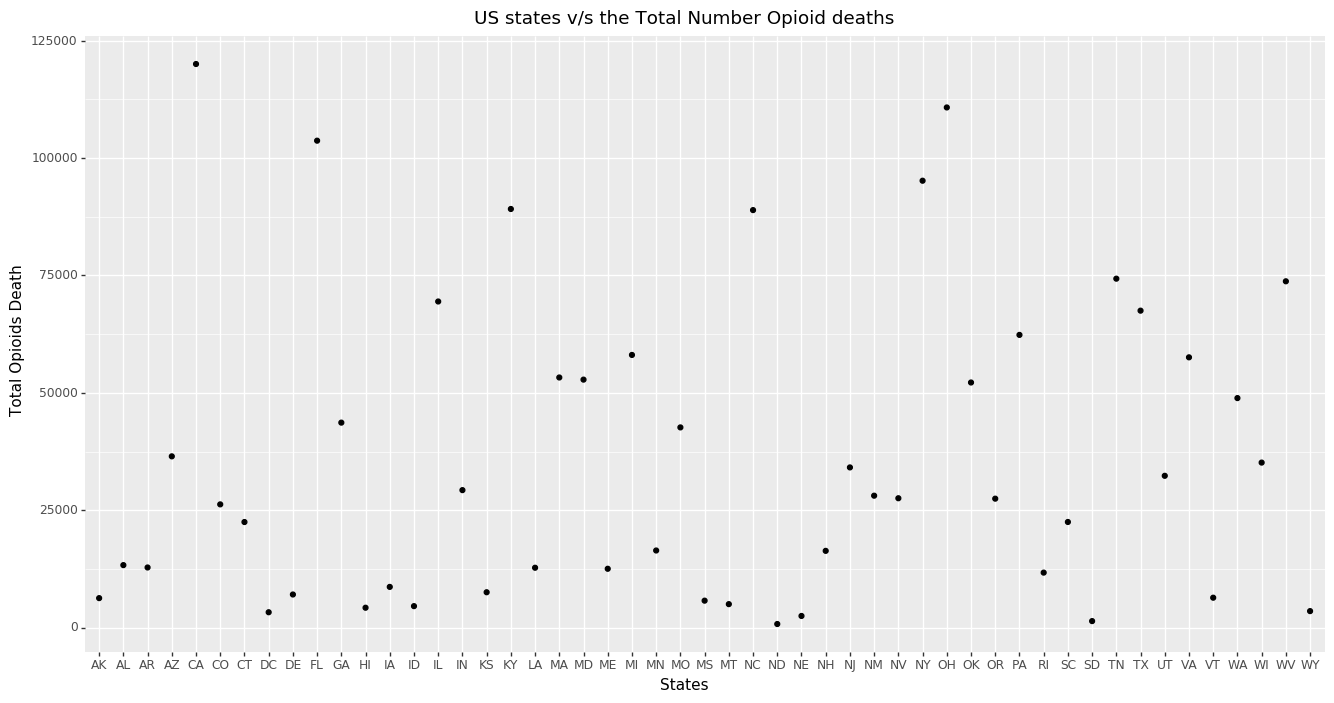

<ggplot: (-9223363306729139719)>

In [212]:
p1=ggplot(opi,aes(x='F12424',y='Total_Opioids_Death'))+geom_point()+ggtitle("US states v/s the Total Number Opioid deaths") + xlab("States") + ylab("Total Opioids Death")+theme(figure_size=(16, 8))

p1

In [263]:
# This is an interactive map. When executing the cell remove the hash symbol in front to fig.show() to view the graph.
# After veiwing add the # symbol again to avoid the slowness of the notebook
fig = px.choropleth(opi, locations='F12424',
                    locationmode="USA-states", color='Total_Opioids_Death', scope="usa")
 
#fig.show()

# Finding out the medical health availability of a US state with it's population


In [158]:
opi1 = df.groupby('F12424')['F11984','F13191'].sum()
print(opi1)

             F11984      F13191
F12424                         
AK        4983127.0    484826.0
AL       20714820.0   3529629.0
AR       14775809.0   2481692.0
AZ       55618509.0   8127469.0
CA      333690245.0  43331441.0
CO       38594772.0   4783863.0
CT       31964568.0   5193103.0
DC        5518696.0    715664.0
DE        8059978.0   1381088.0
FL      163677508.0  29648887.0
GA       65656092.0   7809469.0
HI       11141477.0   1759302.0
IA       12637243.0   1946725.0
ID        7731159.0   1111664.0
IL      102880142.0  14367317.0
IN       38581316.0   5852541.0
KS       14164009.0   2023895.0
KY       26924850.0   4690083.0
LA       18954095.0   2942957.0
MA       58918423.0   9710753.0
MD       51003699.0   7070233.0
ME       10258741.0   2078109.0
MI       74761311.0  12102782.0
MN       32166475.0   4337118.0
MO       37603913.0   5964014.0
MS        6269981.0    975028.0
MT        4990118.0    818596.0
NC       77744478.0  12239268.0
ND        1369018.0    172623.0
NE      

In [159]:
opi1=pd.DataFrame(opi1)
opi1=opi1.reset_index()
opi1.head()

,F12424,F11984,F13191
0,AK,4983127.0,484826.0
1,AL,20714820.0,3529629.0
2,AR,14775809.0,2481692.0
3,AZ,55618509.0,8127469.0
4,CA,333690245.0,43331441.0


In [160]:
list(opi1.columns.values)

['F12424', 'F11984', 'F13191']

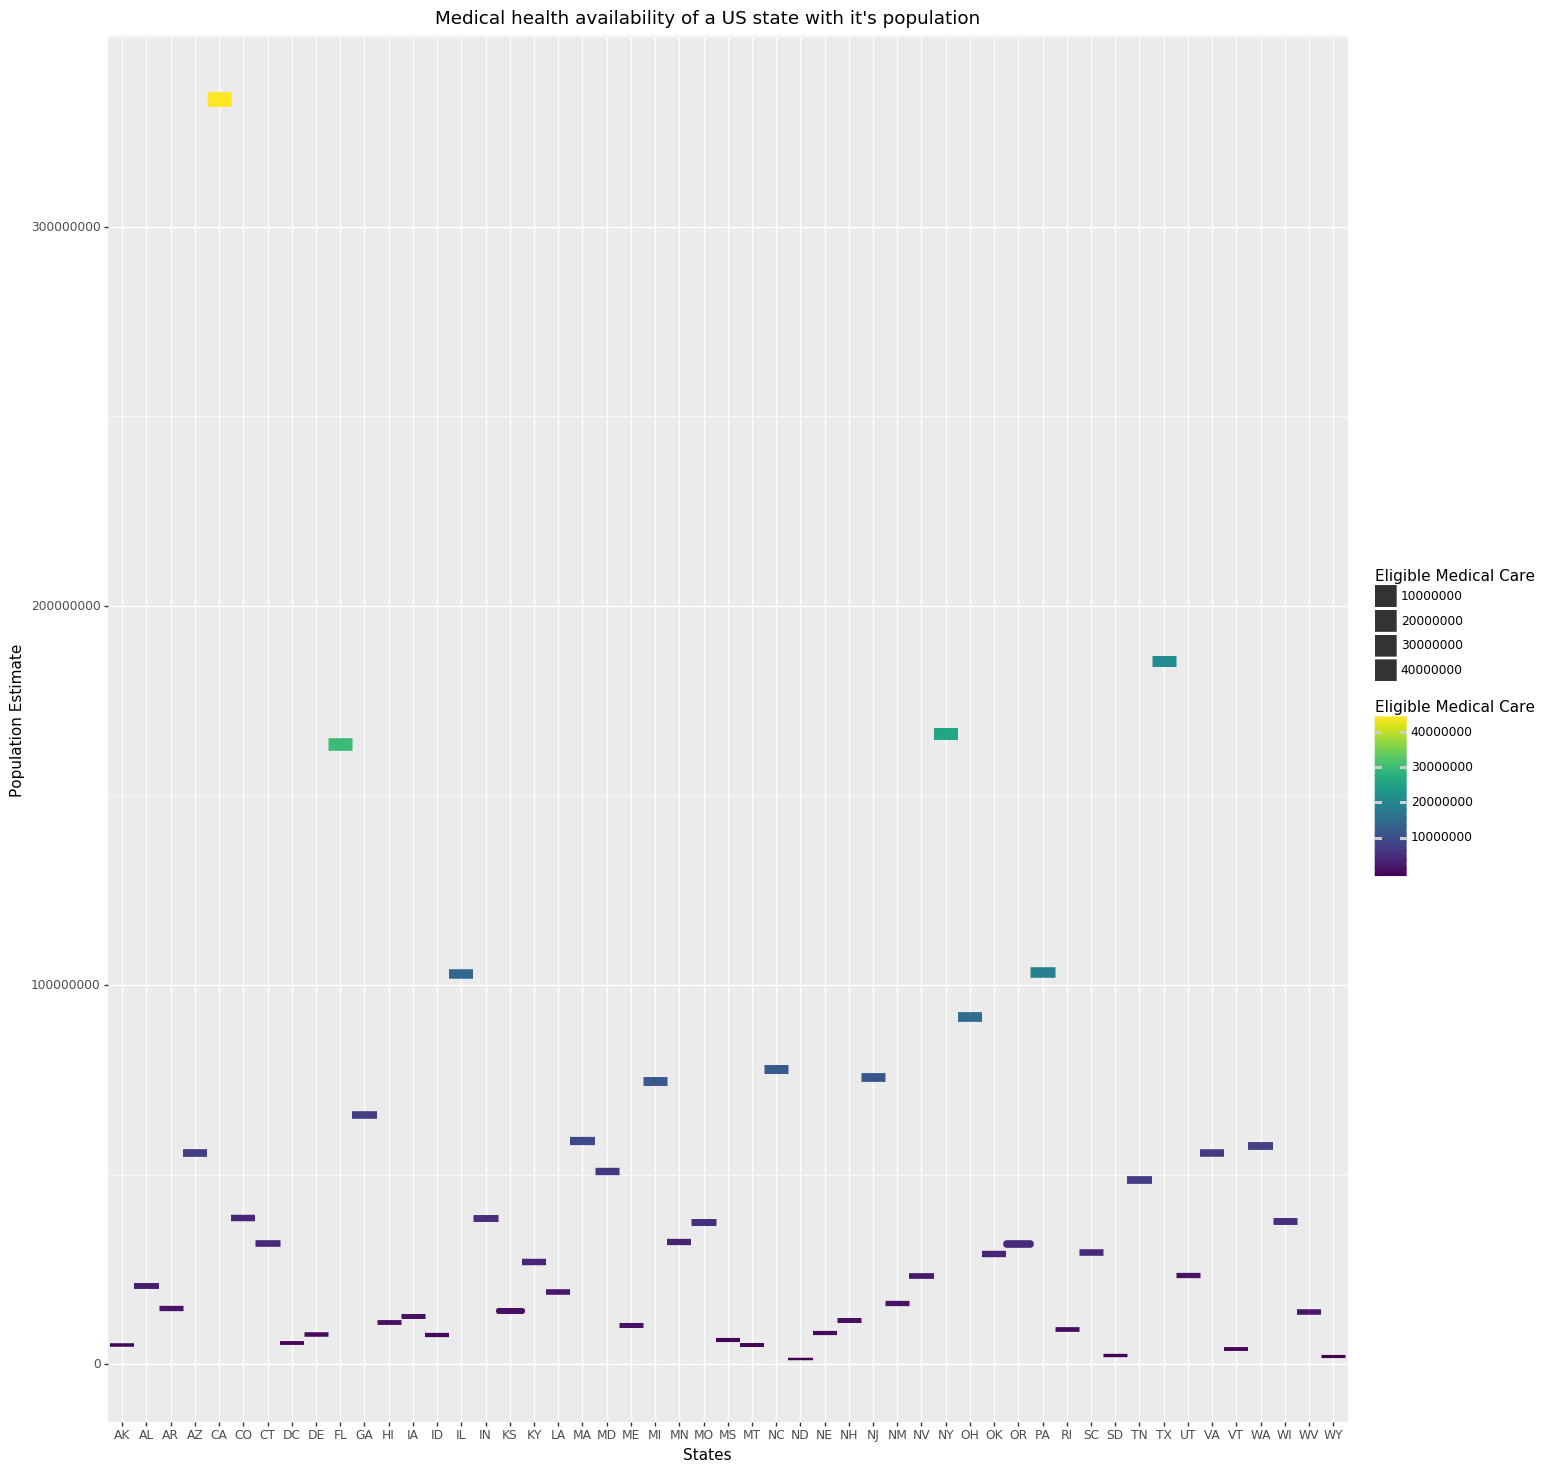

<ggplot: (-9223363306854636277)>

In [254]:
p2=ggplot(opi1,aes(x='F12424',y='F11984',size='F13191',color='F13191'))+geom_tile() +ggtitle("Medical health availability of a US state with it's population") + xlab("States") + ylab("Population Estimate")+labs(color='Eligible Medical Care',size='Eligible Medical Care')+theme(figure_size=(16, 18))
p2

# Finding out the difference between per capita income of a household and median income of a household of each state and plot it as a graph

In [162]:
df['Difference_Income']=(df['F09781']*df['F11984'])-df['F13226']

In [163]:
df.head()

,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,NP_RX,PDMP_REQ_CHECK,Total_Opioids_Death,Total_Dentist,Difference_Income
5,2006,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,8.783549,0,24.0,29.821074,29.821074,1,0,107.642147,38.518887,2.634212e+09
11,2006,2020,AK,Anchorage (B),"ANCHORAGE (B), AK",2.0,2.0,232,4,2,...,7.584858,0,64.0,22.963760,22.963760,1,0,173.927521,71.044133,1.211865e+10
14,2006,2122,AK,Kenai Peninsula (B),"KENAI PENINSULA (B), AK",7.0,2.0,30,3,1,...,11.999082,0,12.0,22.942796,22.942796,1,0,69.885592,49.709391,1.774568e+09
17,2006,2090,AK,Fairbanks North Star (B),"FAIRBANKS NORTH STAR (B), AK",3.0,2.0,44,1,0,...,7.348364,0,12.0,13.832215,13.832215,1,0,51.664430,59.939599,3.012214e+09
19,2007,2170,AK,Matanuska-Susitna (B),"MATANUSKA-SUSITNA (B), AK",2.0,1.0,26,1,1,...,8.550968,0,34.0,41.127871,41.127871,1,0,150.255743,37.498942,2.838871e+09


In [164]:
opi2 = df.groupby('F12424')['Difference_Income'].sum()
print(opi2)

F12424
AK    2.431025e+11
AL    7.831551e+11
AR    5.470403e+11
AZ    1.952842e+12
CA    1.517363e+13
CO    1.727041e+12
CT    1.914258e+12
DC    3.656615e+11
DE    3.388289e+11
FL    6.562807e+12
GA    2.482130e+12
HI    4.811354e+11
IA    5.165805e+11
ID    2.765785e+11
IL    4.619777e+12
IN    1.455544e+12
KS    6.406247e+11
KY    9.617971e+11
LA    7.703763e+11
MA    3.136495e+12
MD    2.561259e+12
ME    3.931579e+11
MI    2.830203e+12
MN    1.539554e+12
MO    1.524411e+12
MS    2.185719e+11
MT    1.897703e+11
NC    2.862226e+12
ND    6.343084e+10
NE    3.724354e+11
NH    5.492002e+11
NJ    4.003688e+12
NM    5.497560e+11
NV    9.165858e+11
NY    8.531654e+12
OH    3.536953e+12
OK    1.144325e+12
OR    1.208972e+12
PA    4.506578e+12
RI    4.008063e+11
SC    1.006779e+12
SD    1.044603e+11
TN    1.846400e+12
TX    7.811831e+12
UT    7.969873e+11
VA    2.703211e+12
VT    1.750491e+11
WA    2.594564e+12
WI    1.552328e+12
WV    4.650947e+11
WY    1.039785e+11
Name: Difference_Income,

In [165]:
opi2=pd.DataFrame(opi2)
opi2=opi2.reset_index()
opi2.head()


,F12424,Difference_Income
0,AK,2.431025e+11
1,AL,7.831551e+11
2,AR,5.470403e+11
3,AZ,1.952842e+12
4,CA,1.517363e+13


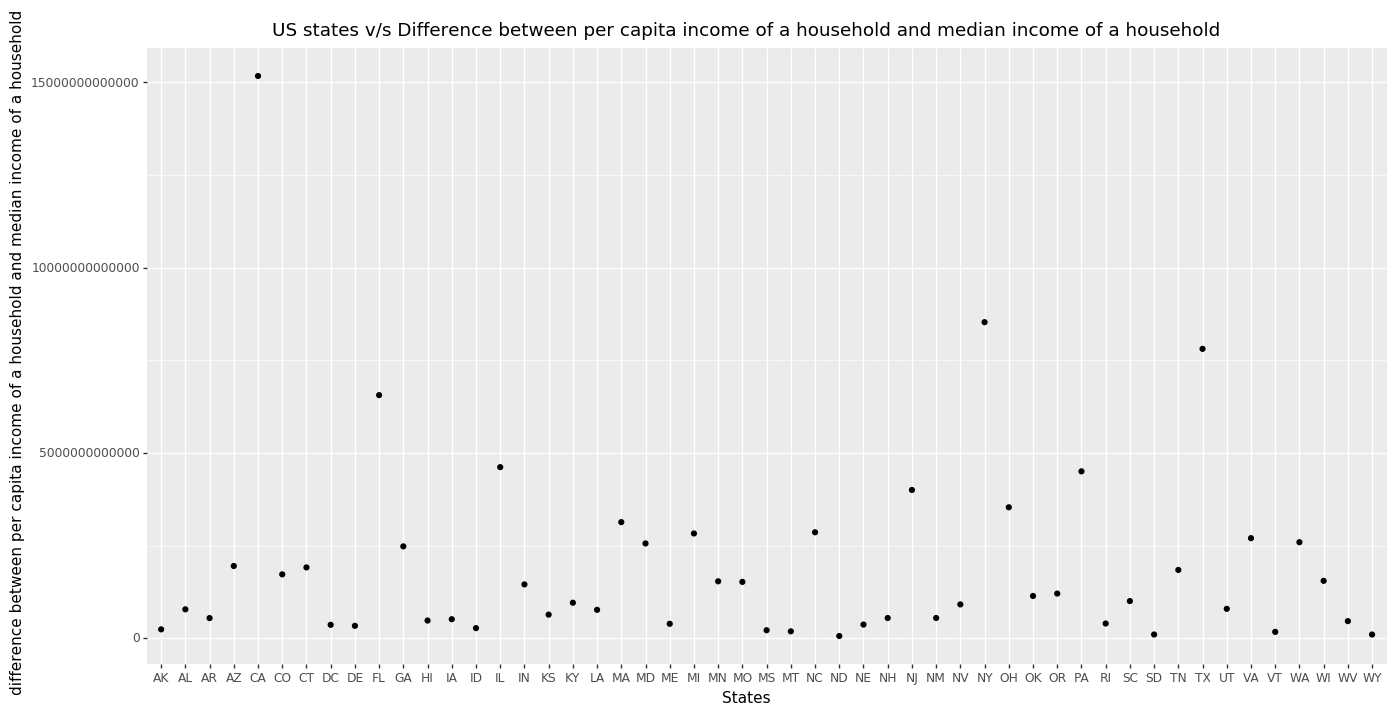

<ggplot: (-9223363306729185122)>

In [230]:
p3=ggplot(opi2,aes(x='F12424',y='Difference_Income'))+geom_point()+ggtitle("US states v/s Difference between per capita income of a household and median income of a household") + xlab("States") + ylab("difference between per capita income of a household and median income of a household")+ theme(figure_size=(16, 8))
p3

# Visualizing the % of poverty in every state

In [265]:
# This is an interactive map. When executing the cell remove the hash symbol in front to fig.show() to view the graph.
# After veiwing add the # symbol again to avoid the slowness of the notebook

fig = px.choropleth(df, locations='F12424',locationmode="USA-states", color='F13321', scope="usa")
 
#fig.show()

# Comparing the male and female population


In [259]:
opi3 = df.groupby('F12424')['F13906','F13907'].sum()
print(opi3)

             F13906       F13907
F12424                          
AK        2573973.0    2410996.5
AL       10003775.5   10709600.0
AR        7233528.0    7546989.5
AZ       27825664.5   27938904.5
CA      166417756.5  167347057.5
CO       19322877.5   19314340.0
CT       15572879.0   16367090.5
DC        2611468.0    2914331.5
DE        3906115.0    4152057.5
FL       79983615.5   83697637.5
GA       32178666.0   33623140.0
HI        5599752.0    5517397.5
IA        6219121.0    6422385.5
ID        3857468.0    3875882.0
IL       50507820.0   52442247.5
IN       18898934.0   19683204.5
KS        6988933.0    7179326.0
KY       13178390.5   13745286.5
LA        9164838.0    9806461.0
MA       28585314.0   30375646.5
MD       24690772.5   26304483.0
ME        5011625.5    5242850.5
MI       36613110.5   38200328.0
MN       15946553.0   16231892.5
MO       18324658.5   19306491.5
MS        3042595.5    3230285.0
MT        2487069.0    2501327.0
NC       37953184.0   39790561.0
ND        

In [260]:
opi3=pd.DataFrame(opi3)
opi3=opi3.reset_index()
opi3.head()

,F12424,F13906,F13907
0,AK,2573973.0,2410996.5
1,AL,10003775.5,10709600.0
2,AR,7233528.0,7546989.5
3,AZ,27825664.5,27938904.5
4,CA,166417756.5,167347057.5


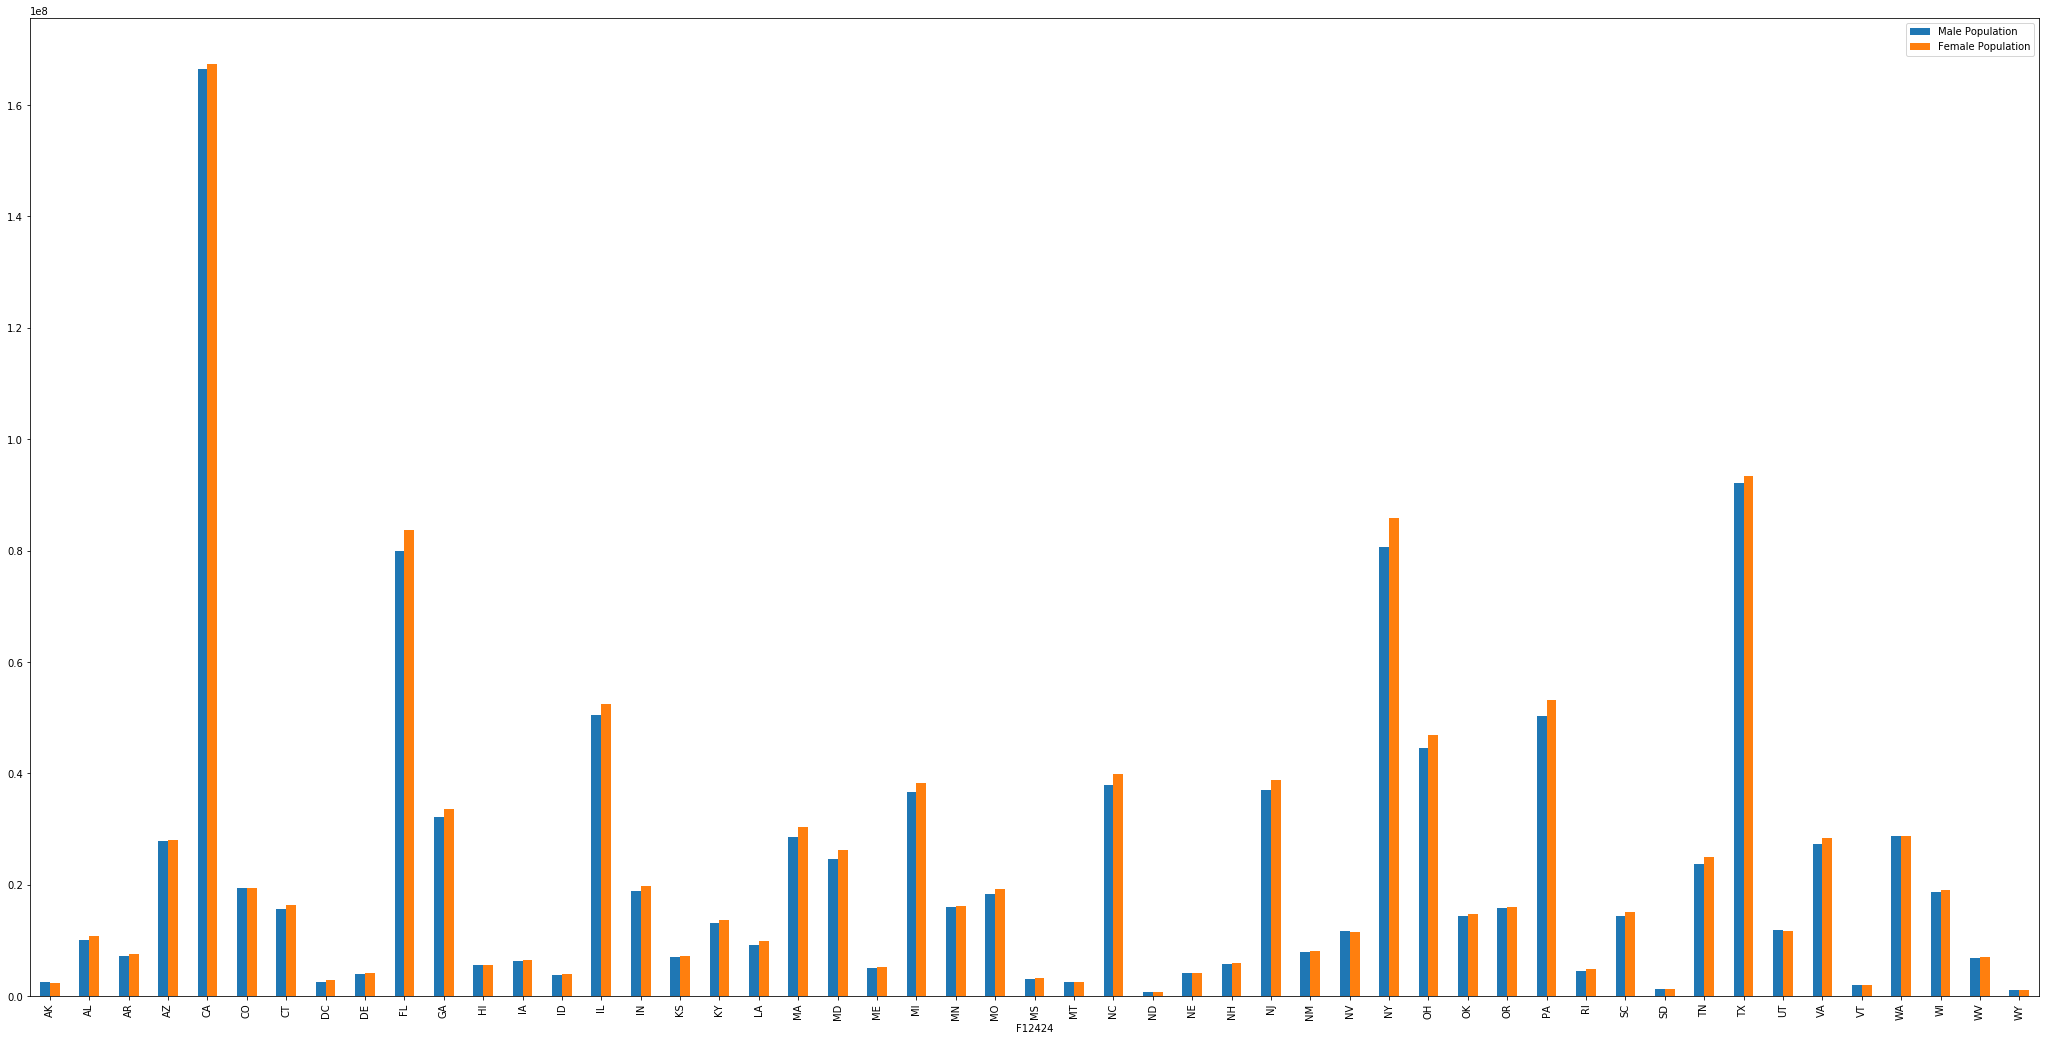

In [280]:
p1=opi3.plot(x="F12424", y=["F13906", "F13907"], kind="bar",figsize=(36,18))
p1.legend(["Male Population", "Female Population"])




In [242]:
# This is an interactive map. When executing the cell remove the hash symbol in front to fig.show() to view the graph.
# After veiwing add the # symbol again to avoid the slowness of the notebook
fig = px.choropleth(df, locations='F12424', locationmode="USA-states", color='F13906', scope="usa",color_continuous_scale="Viridis")
 
#fig.show()

In [169]:
# This is an interactive map. When executing the cell remove the hash symbol in front to fig.show() to view the graph.
# After veiwing add the # symbol again to avoid the slowness of the notebook
fig=px.choropleth(df, locations='F12424', locationmode="USA-states", color='F13907', scope="usa")
#fig.show()

## Lifecycle of the Opioid Project


We all know the DSA lifecycle, but how I incorporated that to finish the project is what I will discuss.

1.	Project Definition, Requirements, and Expectations
“Predicting the Total Opioids deaths in a particular state and county based on its sociodemographic factors” is the aim of this particular project/story. In this, we are trying to figure out which of the sociodemographic factors affect people dying of opioids. The sociodemographic factors could be the population, land area, poverty, medical availability, and supply of opioids. We require a data set that contains all the above-mentioned factors and any other factors that might lead to opioid death.

2.	Data Acquisition, Governance, Curation, and Source Code Management
The data can be acquired from https://data.mendeley.com/datasets/dwfgxrh7tn/6 and the description of the data can be read at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7881250/.

3.	Data Shaping and Carpentry
In this step, we will remove and clean the data that we do not need in our project. Like there are 4 columns in which we have cancer-related data that is not needed for our project so we can remove those columns. Since we are calculating the total opioid death and 4 columns have a count of different opioid death so we created a column that sums up all 4 columns. Since there are NA values in between when we try to sum up it gives an error. So we dropped the NA values to get the correct values. Since predicting the exact values of opioid death might be difficult I created 10 ranges of the values and assign them to the 10 values.


4.	Exploratory Data Analysis and Visualization
In this, we have visualized a few of the graphs. We will discuss them one by one.

 The first one would be the graph of US states v/s the total opioid deaths. I have plotted two graphs in this one is static and the other is an interactive graph. In the static graph, it’s easy to demarcate the state with the highest death rate which is CA. But finding the one with the lowest crime rate is tough. Whereas in the interactive graph we have a scale with specific colors which tells us the color range in which a particular state lies. Since the graph is interactive hovering over the graph will give us the exact count of the number of deaths in a particular state. From that, we can find out that hovering dark shade of blue colored shades ND has the least number of deaths 

The second visualization tells us the medical health availability of a US state with its population. First, we sum all the county population of a particular state to calculate the total population of that state and we do the same for medical health too. Then we plot the states on the x-axis and the total population of a particular state on the y-axis. The color and the size are represented by the medical health availability. The color yellow implies that high availability of medical health and blue defines the low. The thinner the line the lower the medical health availability

The third visualization shows the difference between the per capita income of a household and the median income of a household in each state. For this, we first summed the total per capita income of every state as well as the total median income of the state. Then we multiplied the total per capita income by its total population. The result would be the total income of that state. Subtracting the total median income from the total income would give us the difference which has been plotted. This shows that CA has the most income and states ND, WY and SD have low income. From the graph, we can find out that the difference between the highest and the lowest states is way too huge. And there are only 3 states in which income is more than 50 percent of the entire range 


The fourth visualization shows the percentage of poverty in every state. For this, I have used an interactive graph. The color range tells us the shades of yellow have more poverty whereas the shades of blue have less poverty. From this legend, we can infer that MO and AR have the most poverty and 3 states have the dark blue shade IL, MI, and NJ has the least poverty. On hovering over the states it can tell us the exact value of the poverty percentage.

The fifth visualization compares the male and female populations of every state. First, we summed up the total male and female population of every state. We plot that vs the states of the US. The blue represents the male population whereas the orange represents the female population. We can see that the male population is lower than the female population or it is at power with the female population except in one state NV which has a male population than a female population. I have also plotted two individual graphs of the male and the female population to find out the exact population of that particular state. It is an interactive graph so hovering over the states will give us the exact population of that state.



5.	Statistics and Machine Learning Model, Planning and Building Testing
We created a new data frame called op_main where I picked a few columns from the data which I thought were essential for our prediction. We created the train and test where the train has 75% of the op_main dataset and the test 25% of the remaining data.

Model 1.1 – Predicting the opioid death range. In the train and test divide into two arrays X and y. Where the arrays X have all the values except the Total_Opioid_Death_Quartile. The array y has Total_Opioid_Death_Quartile. We use the Decision Tree Classification criterion entropy to train the model. Then we test it on the trained model using the trained model to predict the discrepancies. Next, we test it on the test model using the trained model. We will find out the error rate as well as the mislabelled points.

Model 1.2 –This is same as the Model 1.1 except that we are predicting the total number of deaths so the array y has Total_Opioid_Death. Everything else would we be exactly the same 

 
Model 2.1 – Predicting the opioid death range. In the train and test divide into two arrays X and y. Where the arrays X have the values that have a correlation more than 0.9 in the correlation matrix except the Total_Opioid_Death_Quartile. The array y has Total_Opioid_Death_Quartile. We use the Decision Tree Classification criterion entropy to train the model. Then we test it on the trained model using the trained model to predict the discrepancies. Next, we test it on the test model using the trained model. . We will find out the error rate as well as the mislabelled points.

Model 2.2 –This is same as the Model 2.1 except that we are predicting the total number of deaths so the array y has Total_Opioid_Death. Everything else would we be exactly the same


6.	Statistics and Machine Learning Models, Validation, Visualization, and Verification
To, visualize what our results are we will create a linear regression model. We train the model to fit the regression model. Using that we find out the regression intercept, and regression coefficients of every column and also find out the R-squared value. This is supposed to be closer to 1. Then we plot the linear regression graph.

 
7.	Data Story, Product Development, and Reporting
I did find out a lot regarding opioids during this particular project. Though our accuracy rate of the model is very low. It concludes that there are other major factors that are influencing the deaths due to opioids. It also tells us that when we are trying to find out the actual values of the death the accuracy rate decreases than when we are trying to find the ranges in which the death rate lies. Our aim is to find out those sociodemographic factors and include them in our model so that our prediction becomes more accurate. 

8.	Statistics and Machine Learning Model, Product Deployment and Monitoring.
I have created this model in such a way that we can add and delete columns in the future to manage and train the model. My goal is not just to stop with this model but to try to perfect this model and see how correct can we use it to predict the current scenarios. 
 